<a href="https://colab.research.google.com/github/DevashishDutta/CS809/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import *
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn
import io
from google.colab import files
file=files.upload()
#Load data as data frame object
loaded_data = pd.read_excel(io.BytesIO(file['EconData.xls']))
print(loaded_data.head(4))


Saving EconData.xls to EconData (1).xls
   Year  Unemployment  Inflation  Presidential Approval  Consumer Confidence
0  1948           3.8        9.5                   38.0                  NaN
1  1952           3.1        2.2                   32.0                 86.2
2  1956           3.9        0.1                   67.0                100.2
3  1960           4.8        1.4                   57.0                 90.1


In [107]:
#Data preprocessing
df = loaded_data.drop('Year', axis=1)
df.fillna(method="bfill", inplace=True)
df.interpolate( inplace=True)

print(df.head(4))


   Unemployment  Inflation  Presidential Approval  Consumer Confidence
0           3.8        9.5                   38.0                 86.2
1           3.1        2.2                   32.0                 86.2
2           3.9        0.1                   67.0                100.2
3           4.8        1.4                   57.0                 90.1


In [108]:
#QUESTION (A) Finding COVARIANCE MATRIX and CORRELATION MATRIX
x_std = StandardScaler().fit_transform(df)
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)
print('COVARIANCE MATRIX \n%s'   %cov_mat)

COVARIANCE MATRIX 
[[ 1.03125     0.29210184  0.06375668 -0.17771527]
 [ 0.29210184  1.03125    -0.44045013 -0.40991431]
 [ 0.06375668 -0.44045013  1.03125     0.73797604]
 [-0.17771527 -0.40991431  0.73797604  1.03125   ]]


In [109]:
#QUESTION (A) Finding COVARIANCE MATRIX and CORRELATION MATRIX
corr_matrix = df.corr()
corr_matrix
print('CORRELATION MATRIX')
corr_matrix

CORRELATION MATRIX


,Unemployment,Inflation,Presidential Approval,Consumer Confidence
Unemployment,1.000000,0.283250,0.061825,-0.172330
Inflation,0.283250,1.000000,-0.427103,-0.397493
Presidential Approval,0.061825,-0.427103,1.000000,0.715613
Consumer Confidence,-0.172330,-0.397493,0.715613,1.000000


In [110]:
#QUESTION (B) Perform PCA/SVD, choose appropriate number(justify by a scree plot) of dimensions/principal 
# components/singular values and find the new data matrix in terms of these dimensions.



#Perform eigen decomposition on covariance matrix.
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigen Vector\n%s' %eig_vecs)
print('\n Eigen Value\n%s'  %eig_vals)

Eigen Vector
[[ 0.19437758  0.86800557 -0.2602332  -0.37558272]
 [ 0.5038221   0.28165577  0.16009527  0.80075141]
 [-0.58657141  0.38353276  0.70727179  0.09275358]
 [-0.60358482  0.14191191 -0.63750671  0.45730906]]

 Eigen Value
[2.14781785 1.1251492  0.24291053 0.60912242]


In [111]:
#Visually confirm that the list in correctly sorted by deceasing eigen values.
eig_pairs = [ ( np.abs(eig_vals[i]), eig_vecs[:, i] ) for  i in range ( len (eig_vals) )]
print('Eigen value in decreasing order')
for i in eig_pairs:
  print( i[0] )


from sklearn.decomposition import PCA
pca = PCA( n_components = 2 )
pca.fit_transform(df)
print( pca.explained_variance_ratio_ )

Eigen value in decreasing order
2.1478178493180433
1.1251492040690794
0.2429105287844512
0.6091224178284224
[0.81538363 0.13411292]


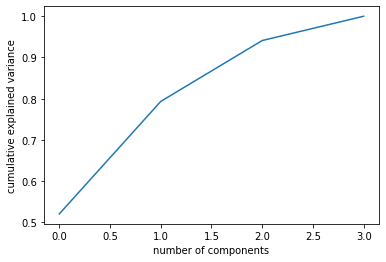

In [112]:
#Explained Variance with the help of "SCREE PLOT"
pca = PCA().fit(x_std)
plt.plot( np.cumsum( pca.explained_variance_ratio_ ) )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [114]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=4)
dim_5=pca1.fit_transform(df)
print(pca1.explained_variance_ratio_)

[0.81538363 0.13411292 0.04353767 0.00696578]


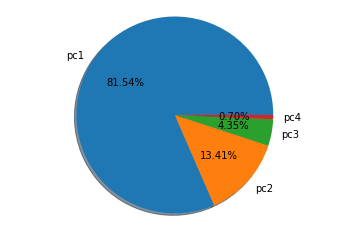

In [115]:
import matplotlib.pyplot as plt
exp_vals=pca1.explained_variance_ratio_
exp_labels=["pc1", 'pc2','pc3','pc4']
plt.pie(exp_vals,labels=exp_labels, radius=1,autopct="%0.2f%%", shadow=True)
plt.axis("equal")
plt.show()

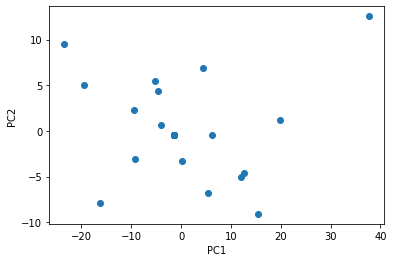

In [116]:
#QUESTION(C) Plot the scatter plot of this data along the two dimensions(2D)
pca=PCA(n_components=3)
new_dim=pca.fit_transform(df)
new_df=pd.DataFrame(new_dim,columns=['pc1','pc2','pc3'])
plt.figure()
plt.scatter(new_df['pc1'], new_df['pc2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

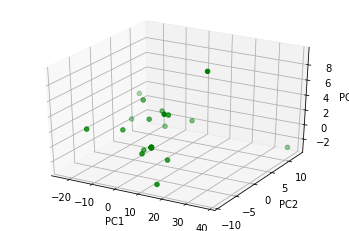

In [117]:
#QUESTION(C) Plot the scatter plot of this data along the three dimensions(3D)
pca=PCA(n_components=3)
figval = plt.figure()
plot1 = figval.add_subplot(projection='3d')

plot1.scatter(new_df['pc1'],new_df['pc2'],new_df['pc3'], c='g')

plot1.set_xlabel('PC1')
plot1.set_ylabel('PC2')
plot1.set_zlabel('PC3')
plt.show()